**Equipe:**

Juliana Pirolla 12925709

Bruna Gongora Bariccatti 12674933

Isabela Clementino Ponciano Ferreira Costa dos Santos 14654207

# Trabalho Prático 1

Este trabalho foi desenvolvido no contexto da disciplina SME0510 – Introdução à Pesquisa Operacional, cujo objetivo é aplicar os conceitos teóricos de otimização inteira na modelagem e resolução de um problema real descrito na literatura científica. O artigo escolhido para análise e implementação é “Modelos de localização para avaliação e proposição de casas de convivência para idosos no Rio de Janeiro”, apresentado no LVI Simpósio Brasileiro de Pesquisa Operacional. O estudo propõe o uso de modelos clássicos de localização (P-Mediana e P-Centro) para avaliar a atual distribuição das Casas de Convivência mantidas pela Prefeitura do Rio de Janeiro e sugerir novas localizações que melhorem o atendimento à população idosa. 
Nessa etapa, iremos complementar o projeto 1 ao analisarmos o problema agora numa abordagem que propõe a resolução do problema relaxado, bem como a proposição de uma heurística baseada em relaxação.

## Introdução

O envelhecimento populacional tem se consolidado como um dos maiores desafios sociais contemporâneos, refletindo transformações demográficas profundas em escala global e nacional. No Brasil, o Censo Demográfico de 2022 revela que a proporção de pessoas com mais de 65 anos atingiu 10,9% da população, um aumento de 57,4% em relação a 2010. No município do Rio de Janeiro, essa realidade é ainda mais expressiva, com 121,4 idosos para cada 100 jovens de até 14 anos. Esse cenário demanda a formulação de políticas públicas voltadas à promoção do envelhecimento saudável, inclusão social e qualidade de vida para a população idosa.

Diante dessa conjuntura, o artigo “Modelos de localização para avaliação e proposição de Casas de Convivência para idosos no Rio de Janeiro” propõe uma análise detalhada da infraestrutura existente para atendimento a esse público, com foco nas Casas de Convivência mantidas pela Prefeitura por meio da Secretaria Municipal do Envelhecimento Saudável e Qualidade de Vida (SEMESQV). O estudo busca compreender a distribuição espacial das unidades e dos seus frequentadores, avaliando a equidade territorial do acesso e sugerindo novas localizações com base em modelos de Pesquisa Operacional (PO), especificamente os modelos P-Mediana e P-Centro.

O problema abordado é, portanto, a desigualdade socioespacial na oferta de equipamentos públicos voltados à população idosa, uma questão que passa a dimensão geográfica e atinge diretamente a justiça social e o direito à cidade. A localização inadequada das Casas de Convivência implica barreiras de acessibilidade e exclusão, sobretudo para idosos que dependem de deslocamentos curtos e seguros. Assim, o trabalho investiga como modelos matemáticos de otimização podem auxiliar gestores públicos na tomada de decisão, propondo a abertura de novas unidades de forma racional e baseada em dados.

O artigo dialoga com diversos trabalhos relacionados, tanto nacionais quanto internacionais, que exploram a aplicação da Pesquisa Operacional em contextos sociais. Entre eles, destacam-se os estudos de Bittencourt et al. (2022) e De Armas et al. (2021), que aplicam modelos de localização para otimizar serviços de cuidado a idosos na Espanha, e os de Miranda et al. (2016a, 2016b), que analisam o envelhecimento populacional e a qualidade de vida dos idosos no Brasil. Tais referências reforçam a relevância do tema e evidenciam uma lacuna ainda existente na realidade brasileira quanto à utilização de metodologias quantitativas para embasar políticas sociais.

A importância desse problema reside na possibilidade de tornar mais eficiente e equitativa a rede de serviços públicos destinados à terceira idade. Além de sua aplicação direta à gestão urbana e ao planejamento social, o estudo demonstra como a integração entre dados geoespaciais, modelos matemáticos e ferramentas de visualização, como o aplicativo Shiny desenvolvido pelos autores, pode fortalecer a transparência e a efetividade das decisões públicas. Em um contexto de recursos limitados e demandas crescentes, a adoção de abordagens analíticas desse tipo representa um caminho promissor para o desenvolvimento de políticas baseadas em evidências, voltadas à construção de cidades mais justas, inclusivas e sensíveis às necessidades do envelhecimento populacional.

### Instalação de ferramentas

In [1]:
!pip install gurobipy numpy matplotlib

In [2]:
import numpy as np
import random
import copy
import json
import matplotlib.pyplot as plt

import gurobipy as gp
from gurobipy import GRB
from functools import partial

## Modelagem Matemática

Abordar o modelo da pág 06/12

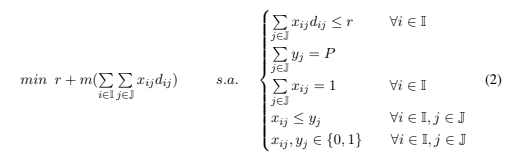

Nesta seção iremos modelar matematicamente utilizando o *solver* Gurobi o modelo apresentado no trabalho:

Dados de entrada:


$P →$ Numero de casas de convivência abertas.\
$d_{ij} →$ Distancia entre cidadão i e casa de convivência j.\
$m →$  Small-m.



Índices:

$i = 1,...., I →$ Frequentadores de casas de convivencia do Rio de Janeiro.\
$j = 1,...., J →$ Casas de convivencia existentes e potenciais.

minimizar $r + m(\sum_i\sum_jx_{ij}d_{ij} $) (1)

sujeito a:


$$\sum_{j∈J}x_{ij}d_{ij} \le r ∀ i ∈ I (2)$$
$$\sum_{j∈J}y_{j} = P (2)$$
$$\sum_{j∈J}x_{ij} = 1 ∀ i ∈ I (3)$$
$$x_{ij} \le y_{j} ∀ i ∈ I, j ∈ J (4)$$
$$x_{ij}, y_{j} ∈ {0,1} ∀ i ∈ I, j ∈ J (5)$$
$$r \le 0  (6)$$

O modelo P-Centro tem como propósito principal minimizar a distância máxima entre os idosos e as Casas de Convivência às quais eles são atendidos. Em outras palavras, o modelo busca reduzir o raio de cobertura do serviço, garantindo que todos os idosos estejam dentro de uma distância razoável de, pelo menos, uma unidade. Diferentemente do modelo P-Mediana, que prioriza a eficiência média do sistema (minimizando o deslocamento médio da população atendida), o P-Centro se preocupa com a equidade no acesso, procurando evitar que determinados grupos ou regiões fiquem desatendidos ou precisem percorrer trajetos longos.

A função objetiva (1) busca minimizar primeiro o raio máximo de atendimento r, garantindo cobertura mais justa e uniforme e secundariamente minimizar a soma total das distâncias, caso existam soluções com o mesmo raio.

As restrições do modelo exercem papéis complementares e fundamentais para que a solução seja viável e coerente com a realidade. Uma delas (2) limita o número de Casas que podem ser abertas, representando o orçamento e os recursos disponíveis da administração pública. A seguinte (3) assegura que todos os idosos sejam atendidos, ou seja, cada pessoa deve estar vinculada a exatamente uma Casa de Convivência. Também há restrições que impedem alocações incoerentes, garantindo que um idoso só possa ser designado a uma Casa que esteja efetivamente aberta (4).

Por fim, uma das restrições mais importantes determina que a distância entre cada idoso e a Casa a que ele é alocado não ultrapasse o raio máximo definido pelo modelo. É essa condição que dá sentido ao problema de P-Centro, pois ela impõe um limite de cobertura que o algoritmo tenta minimizar. Assim, o modelo busca encontrar a melhor configuração de locais para abrir novas unidades de modo que a distância mais longa entre um idoso e sua Casa seja a menor possível.

Em termos conceituais, o P-Centro reflete uma abordagem voltada à justiça espacial. Ele procura garantir que o acesso aos serviços públicos seja o mais homogêneo possível, evitando situações em que determinados bairros ou regiões fiquem excessivamente afastados das Casas de Convivência. Essa característica torna o modelo especialmente adequado para políticas sociais, nas quais a proximidade e a inclusão são mais importantes do que simplesmente otimizar custos médios.

No contexto do artigo, o uso do P-Centro permitiu propor uma distribuição geográfica mais equilibrada das novas unidades, contemplando regiões que, até então, apresentavam baixa cobertura. Desse modo, o modelo se mostrou mais eficaz para promover igualdade no acesso aos serviços, ainda que possa resultar em um aumento leve na distância média percorrida, havendo um trade-off esperado quando se busca maximizar o alcance social das políticas públicas.

### Implementação do modelo

Vamos criar uma função que recebe os dados de parâmetro e retorna o modelo do Gurobi

In [10]:
import gurobipy as gp
from gurobipy import GRB

def criarModelo(dados, instancia):
    numFrequentadores = len(dados["I"])  # número de frequentadores
    numCasas = len(dados["J"])           # número de casas

    model = gp.Model(f"Modelo_PCentro_{instancia}")

    print("- Gerando variáveis")
    x = model.addVars(numFrequentadores, numCasas, vtype=GRB.BINARY, name="x")
    y = model.addVars(numCasas, vtype=GRB.BINARY, name="y")
    r = model.addVar(vtype=GRB.CONTINUOUS, lb=0, name="r")

    print("- Gerando função objetivo")
    model.setObjective(r + dados["M"] * gp.quicksum(x[i, j] * dados["d"][i][j]for i in range(numFrequentadores)for j in range(numCasas)),GRB.MINIMIZE)

    print("- Adicionando restrições")

    # 1. Cada frequentador deve estar dentro do raio máximo r
    for i in range(numFrequentadores):model.addConstr(gp.quicksum(x[i, j] * dados["d"][i][j] for j in range(numCasas)) <= r,name=f"restr_cobertura_{i}")

    # 2. Número fixo de Casas abertas (P)
    model.addConstr(gp.quicksum(y[j] for j in range(numCasas)) == dados["P"],name="restr_num_casas")

    # 3. Cada frequentador deve ser alocado a exatamente uma Casa
    for i in range(numFrequentadores):
        model.addConstr(gp.quicksum(x[i, j] for j in range(numCasas)) == 1,name=f"restr_alocacao_{i}")

    # 4. Um frequentador só pode ser alocado a uma Casa aberta
    for i in range(numFrequentadores):
        for j in range(numCasas):
            model.addConstr(x[i, j] <= y[j],name=f"restr_dependencia_{i}_{j}")

    model.update()
    return model, x, y, r



## Geração de Instâncias

Para validar o modelo proposto e analisar o comportamento das soluções obtidas, é necessário dispor de um conjunto de instâncias representativas do problema. Seguindo a proposta do artigo “Modelos de localização para avaliação e proposição de Casas de Convivência para Idosos no Rio de Janeiro”, as instâncias devem refletir o cenário de alocação de frequentadores às casas de convivência, considerando diferentes configurações possíveis de distribuição espacial.

Como o objetivo deste trabalho é reproduzir e testar o modelo matemático de forma controlada, optou-se por gerar os dados de maneira aleatória, simulando o comportamento dos frequentadores e das casas em um ambiente sintético. Essa abordagem permite criar diferentes cenários e níveis de complexidade, conforme exigido no enunciado do projeto.

A geração das instâncias foi feita pela função criarInstancia(numFrequentadores, numCasas, P), que cria os conjuntos e parâmetros do modelo da seguinte forma:

- I: conjunto dos frequentadores (cidadãos) numerados de 0 a numFrequentadores - 1.

- J: conjunto das casas de convivência existentes e potenciais, numeradas de 0 a numCasas - 1.

- dᵢⱼ: matriz de distâncias entre cada frequentador i e cada casa j, gerada aleatoriamente com valores inteiros entre 1 e 100.

- P: número de casas que devem ser abertas, de acordo com o cenário analisado.

- M: parâmetro small-m, utilizado no modelo P-Centro para garantir a prioridade da minimização do raio de cobertura.

A semente aleatória (random.seed(12674933)) garante que as instâncias possam ser reproduzidas fielmente, como solicitado no enunciado. Dessa forma, cada execução da função gera uma instância estável, mantendo a consistência nos experimentos.

A escolha por utilizar uma distribuição uniforme discreta para a matriz de distâncias se justifica pelo objetivo de observar o comportamento geral do modelo de localização, independentemente de um contexto geográfico real. Em trabalhos aplicados, como o do artigo original, as distâncias são obtidas a partir de APIs de roteamento (como a OSRM) e refletem a geografia urbana real; porém, neste projeto, a geração sintética de dados é suficiente para testar a robustez do modelo e a eficiência do solver em diferentes configurações.

In [11]:
def criarInstancia(numFrequentadores, numCasas, P):

    random.seed(12674933)

    dados = {
        "I": [i for i in range(numFrequentadores)],   # frequentadores
        "J": [j for j in range(numCasas)],            # casas
        "d": [[random.randint(1, 100) for j in range(numCasas)]
              for i in range(numFrequentadores)],     # matriz de distâncias
        "P": P,                                       # número de casas a abrir
        "M": 1e-6                                     # small-m (muito pequeno)
    }

    return dados

## Resolução de Instâncias

Após a geração das instâncias, foi desenvolvida a função resolverInstancia(dados, instancia) com o objetivo de executar o modelo matemático formulado e obter as soluções otimizadas para cada cenário. Essa função é responsável por integrar a modelagem teórica do problema com o processo computacional de resolução, utilizando o solver de programação inteira para buscar a solução ótima.

A função recebe como entrada os dados de uma instância previamente gerada (frequentadores, casas, matriz de distâncias e o número de casas a serem abertas) e chama a função criarModelo, que constrói o modelo P-Centro conforme as formulações apresentadas no artigo de referência. Em seguida, o solver é executado por meio do comando model.optimize(), e os principais resultados são extraídos e exibidos de forma interpretável, sendo eles:

- Execução e análise de instâncias: permite resolver cada uma das instâncias geradas, retornando o status da solução, o valor da função objetivo, o tempo de processamento e o raio ótimo (r).

- Compreensão das variáveis: imprime de forma organizada quais casas foram abertas (variáveis y[j]) e a alocação dos frequentadores a cada casa (variáveis x[i,j]), possibilitando discutir o significado prático das variáveis e validar o comportamento do modelo nas instâncias simples, conforme solicitado.

- Reprodutibilidade e clareza: o formato dos resultados facilita a verificação manual das soluções nas primeiras instâncias (simples).

- Análise de desempenho: o tempo de execução e o status retornados permitem avaliar a evolução do solver entre instâncias de diferentes tamanhos e complexidades.

Basicamente, a função resolver instância foi criada para facilitar a visualização dos resultados nos casos 1 e 2 do nosso trabalho.

In [12]:
def resolverInstancia(dados, instancia):
    model, x, y, r = criarModelo(dados, instancia)
    model.optimize()

    print(f"\n--- Resultados da instância {instancia} ---")
    print(f"Status: {model.Status}")
    print(f"Raio ótimo (r): {r.X:.2f}")
    print(f"Valor objetivo: {model.ObjVal:.2f}")
    print(f"Tempo de execução: {model.Runtime:.2f}s\n")

    print("Casas abertas:")
    for j in range(len(dados["J"])):
        if y[j].X > 0.5:
            print(f"  - Casa {j}")

    print("\nAlocação dos frequentadores:")
    for i in range(len(dados["I"])):
        for j in range(len(dados["J"])):
            if x[i, j].X > 0.5:
                print(f"  Frequentador {i} → Casa {j} (distância = {dados['d'][i][j]})")

    return model, x, y, r


E para o problema relaxado, definimos:

In [13]:
def modeloRelaxado(dados, model, x, y, r):
    """Adaptação da função modeloRelaxado para o problema p-centro"""
    numFrequentadores = len(dados["I"])
    numCasas = len(dados["J"])

    print("\nAplicando relaxação total (x e y contínuas)...")

    # Relaxar variáveis x (alocação)
    for i in range(numFrequentadores):
        for j in range(numCasas):
            x[i, j].vtype = GRB.CONTINUOUS
            x[i, j].lb = 0
            x[i, j].ub = 1

    # Relaxar variáveis y (abertura de casas)
    for j in range(numCasas):
        y[j].vtype = GRB.CONTINUOUS
        y[j].lb = 0
        y[j].ub = 1

    # Atualizar o modelo
    model.update()

    return model, x, y, r

In [17]:
def resolverInstanciaRelaxada(dados, instancia):
    """Resolve a versão relaxada da instância e imprime os resultados"""
    model, x, y, r = criarModelo(dados, instancia)
    model, x, y, r = modeloRelaxado(dados, model, x, y, r)
    model.optimize()

    print(f"\n--- Resultados da instância {instancia} (Relaxada) ---")
    print(f"Status: {model.Status}")
    if model.Status == GRB.OPTIMAL:
        print(f"Raio relaxado (r): {r.X:.2f}")
        print(f"Valor objetivo relaxado: {model.ObjVal:.2f}")
    print(f"Tempo de execução: {model.Runtime:.2f}s\n")

    if model.Status == GRB.OPTIMAL:
        # Como as variáveis são contínuas, podemos mostrar os valores de y
        print("Valores das variáveis y (abertura de casas):")
        for j in range(len(dados["J"])):
            if y[j].X > 0.001:  # Mostrar apenas valores significativos
                print(f"  Casa {j}: {y[j].X:.3f}")

        # Mostrar alocações (valores de x)
        print("\nValores das variáveis x (alocação):")
        for i in range(len(dados["I"])):
            for j in range(len(dados["J"])):
                if x[i, j].X > 0.001:
                    print(f"  Frequentador {i} → Casa {j}: {x[i, j].X:.3f}")

    return model, x, y, r

In [7]:
def criarModeloRelaxado(dados, model, x, I, y):
    numFrequentadores = len(dados["I"])
    numCasas = len(dados["J"])

    model = gp.Model(f"Modelo_PCentro_{instancia}")

    # Definir tipo das variáveis: relaxado ou inteiro
    if relaxado:
        vtype_x = GRB.CONTINUOUS
        vtype_y = GRB.CONTINUOUS
    else:
        vtype_x = GRB.BINARY
        vtype_y = GRB.BINARY

    print("- Gerando variáveis")
    x = model.addVars(numFrequentadores, numCasas, vtype=vtype_x, name="x")
    y = model.addVars(numCasas, vtype=vtype_y, name="y")
    r = model.addVar(vtype=GRB.CONTINUOUS, lb=0, name="r")

    print("- Gerando função objetivo")
    model.setObjective(
        r
        + dados["M"]
        * gp.quicksum(
            x[i, j] * dados["d"][i][j]
            for i in range(numFrequentadores)
            for j in range(numCasas)
        ),
        GRB.MINIMIZE,
    )

    print("- Adicionando restrições")

    # Restrição 1: Cada frequentador dentro do raio máximo
    for i in range(numFrequentadores):
        model.addConstr(
            gp.quicksum(x[i, j] * dados["d"][i][j] for j in range(numCasas)) <= r,
            name=f"restr_cobertura_{i}",
        )

    # Restrição 2: Número fixo de casas abertas
    model.addConstr(
        gp.quicksum(y[j] for j in range(numCasas)) == dados["P"], name="restr_num_casas"
    )

    # Restrição 3: Cada frequentador alocado a exatamente uma casa
    for i in range(numFrequentadores):
        model.addConstr(
            gp.quicksum(x[i, j] for j in range(numCasas)) == 1,
            name=f"restr_alocacao_{i}",
        )

    # Restrição 4: Alocação apenas a casas abertas
    for i in range(numFrequentadores):
        for j in range(numCasas):
            model.addConstr(x[i, j] <= y[j], name=f"restr_dependencia_{i}_{j}")

    # Restrições de limite para variáveis relaxadas
    if relaxado:
        for i in range(numFrequentadores):
            for j in range(numCasas):
                model.addConstr(x[i, j] >= 0, name=f"restr_x_min_{i}_{j}")
                model.addConstr(x[i, j] <= 1, name=f"restr_x_max_{i}_{j}")
        for j in range(numCasas):
            model.addConstr(y[j] >= 0, name=f"restr_y_min_{j}")
            model.addConstr(y[j] <= 1, name=f"restr_y_max_{j}")

    model.update()
    return model, x, y, r


def resolverModelo(dados, instancia, relaxado=False):
    model, x, y, r = criarModelo(dados, instancia, relaxado)
    model.setParam("OutputFlag", 0)  # Reduzir output
    model.optimize()

    status = model.Status
    if status == GRB.OPTIMAL:
        obj_val = model.ObjVal
        r_val = r.X
        x_vals = {
            (i, j): x[i, j].X
            for i in range(len(dados["I"]))
            for j in range(len(dados["J"]))
        }
        y_vals = {j: y[j].X for j in range(len(dados["J"]))}
    else:
        obj_val = None
        r_val = None
        x_vals = None
        y_vals = None

    return {
        "status": status,
        "obj": obj_val,
        "r": r_val,
        "x": x_vals,
        "y": y_vals,
        "model": model,
        "tempo": model.Runtime,
    }


# ==================== PARTE 2: HEURÍSTICA BASEADA NA SOLUÇÃO RELAXADA ====================


def heuristica_arredondamento(dados, sol_relaxada):
    """
    Heurística baseada na solução relaxada:
    1. Ordena as casas pelo valor de y (da relaxação) em ordem decrescente
    2. Seleciona as P casas com maiores valores de y
    3. Aloca cada frequentador à casa aberta mais próxima
    4. Calcula o raio máximo resultante
    """
    P = dados["P"]
    distancias = dados["d"]
    y_relax = sol_relaxada["y"]

    # Passo 1: Ordenar casas pelo valor de y (decrescente)
    casas_ordenadas = sorted(
        range(len(y_relax)), key=lambda j: y_relax[j], reverse=True
    )

    # Passo 2: Selecionar as P primeiras casas
    casas_abertas = casas_ordenadas[:P]
    y_heur = {j: 1 if j in casas_abertas else 0 for j in range(len(y_relax))}

    # Passo 3: Alocar cada frequentador à casa aberta mais próxima
    x_heur = {}
    raio_max = 0

    for i in range(len(dados["I"])):
        # Encontrar a casa aberta mais próxima para o frequentador i
        dist_min = float("inf")
        casa_escolhida = None

        for j in casas_abertas:
            if distancias[i][j] < dist_min:
                dist_min = distancias[i][j]
                casa_escolhida = j

        # Registrar a alocação
        for j in range(len(dados["J"])):
            x_heur[(i, j)] = 1 if j == casa_escolhida else 0

        # Atualizar raio máximo
        if dist_min > raio_max:
            raio_max = dist_min

    # Calcular a soma das distâncias
    soma_distancias = 0
    for i in range(len(dados["I"])):
        for j in range(len(dados["J"])):
            if x_heur[(i, j)] > 0.5:
                soma_distancias += distancias[i][j]

    # Valor objetivo da heurística (usando o mesmo M do modelo)
    obj_heur = raio_max + dados["M"] * soma_distancias

    return {
        "obj": obj_heur,
        "r": raio_max,
        "x": x_heur,
        "y": y_heur,
        "casas_abertas": casas_abertas,
    }


def heuristica_gulosa(dados, sol_relaxada):
    """
    Heurística gulosa baseada na solução relaxada:
    1. Considera as casas com maior valor de y como mais "promissoras"
    2. Seleciona iterativamente as P casas que mais reduzem o raio máximo
    """
    P = dados["P"]
    distancias = dados["d"]
    n_frequentadores = len(dados["I"])
    n_casas = len(dados["J"])
    y_relax = sol_relaxada["y"]

    # Passo 1: Ordenar casas pelo valor de y
    casas_ordenadas = sorted(range(n_casas), key=lambda j: y_relax[j], reverse=True)

    # Passo 2: Seleção gulosa
    casas_selecionadas = []
    frequentadores_alocados = [False] * n_frequentadores

    while len(casas_selecionadas) < P:
        melhor_casa = None
        melhor_reducao = float("inf")

        for j in casas_ordenadas:
            if j in casas_selecionadas:
                continue

            # Calcular o pior raio se adicionarmos esta casa
            raio_candidato = 0
            for i in range(n_frequentadores):
                if frequentadores_alocados[i]:
                    continue

                # Distância mínima entre o frequentador i e as casas selecionadas + candidata
                dist_min = min([distancias[i][c] for c in casas_selecionadas + [j]])
                if dist_min > raio_candidato:
                    raio_candidato = dist_min

            if raio_candidato < melhor_reducao:
                melhor_reducao = raio_candidato
                melhor_casa = j

        # Adicionar a melhor casa
        casas_selecionadas.append(melhor_casa)

        # Atualizar quais frequentadores já estão bem atendidos
        for i in range(n_frequentadores):
            if not frequentadores_alocados[i]:
                dist_min = min([distancias[i][c] for c in casas_selecionadas])
                if dist_min <= melhor_reducao:
                    frequentadores_alocados[i] = True

    # Alocação final e cálculo do raio
    y_heur = {j: 1 if j in casas_selecionadas else 0 for j in range(n_casas)}
    x_heur = {}
    raio_max = 0
    soma_distancias = 0

    for i in range(n_frequentadores):
        # Encontrar a casa aberta mais próxima
        dist_min = float("inf")
        casa_escolhida = None

        for j in casas_selecionadas:
            if distancias[i][j] < dist_min:
                dist_min = distancias[i][j]
                casa_escolhida = j

        # Registrar alocação
        for j in range(n_casas):
            x_heur[(i, j)] = 1 if j == casa_escolhida else 0

        # Atualizar estatísticas
        soma_distancias += dist_min
        if dist_min > raio_max:
            raio_max = dist_min

    obj_heur = raio_max + dados["M"] * soma_distancias

    return {
        "obj": obj_heur,
        "r": raio_max,
        "x": x_heur,
        "y": y_heur,
        "casas_abertas": casas_selecionadas,
    }


# ==================== PARTE 3: ANÁLISE COMPARATIVA ====================


def analisar_instancia(dados, instancia_id):
    """
    Executa análise completa para uma instância:
    1. Resolve o modelo relaxado (limite inferior)
    2. Aplica heurísticas
    3. Compara resultados
    """
    print(f"\n{'='*60}")
    print(f"ANÁLISE DA INSTÂNCIA {instancia_id}")
    print(f"{'='*60}")

    # 1. SOLUÇÃO RELAXADA (LIMITE INFERIOR)
    print("\n1. RESOLUÇÃO DO MODELO RELAXADO")
    print("-" * 40)
    sol_relaxada = resolverModelo(dados, f"relaxada_{instancia_id}", relaxado=True)

    if sol_relaxada["status"] == GRB.OPTIMAL:
        print(f"Status: Ótimo encontrado")
        print(f"Valor objetivo (limite inferior): {sol_relaxada['obj']:.4f}")
        print(f"Raio máximo (r): {sol_relaxada['r']:.4f}")
        print(f"Tempo de execução: {sol_relaxada['tempo']:.2f}s")

        # Mostrar valores relaxados das variáveis y
        print("\nValores relaxados das variáveis y:")
        for j in range(len(dados["J"])):
            print(f"  Casa {j}: {sol_relaxada['y'][j]:.4f}")
    else:
        print("Erro: Não foi possível resolver a relaxação")
        return None

    # 2. HEURÍSTICAS
    print("\n\n2. APLICAÇÃO DE HEURÍSTICAS")
    print("-" * 40)

    # Heurística 1: Arredondamento simples
    print("\na) Heurística de Arredondamento:")
    heur_arred = heuristica_arredondamento(dados, sol_relaxada)
    print(f"   Valor objetivo: {heur_arred['obj']:.4f}")
    print(f"   Raio máximo: {heur_arred['r']:.4f}")
    print(f"   Casas abertas: {sorted(heur_arred['casas_abertas'])}")

    # Heurística 2: Gulosa
    print("\nb) Heurística Gulosa:")
    heur_gulosa = heuristica_gulosa(dados, sol_relaxada)
    print(f"   Valor objetivo: {heur_gulosa['obj']:.4f}")
    print(f"   Raio máximo: {heur_gulosa['r']:.4f}")
    print(f"   Casas abertas: {sorted(heur_gulosa['casas_abertas'])}")

    # 3. SOLUÇÃO ÓTIMA (SE DISPONÍVEL)
    print("\n\n3. COMPARAÇÃO COM SOLUÇÃO ÓTIMA")
    print("-" * 40)

    # Tentar resolver o modelo inteiro (com timeout para instâncias grandes)
    try:
        print("\nResolvendo modelo inteiro...")
        sol_inteira = resolverModelo(dados, f"inteira_{instancia_id}", relaxado=False)

        if sol_inteira["status"] == GRB.OPTIMAL:
            print(f"Status: Ótimo encontrado")
            print(f"Valor objetivo (ótimo): {sol_inteira['obj']:.4f}")
            print(f"Raio máximo (r): {sol_inteira['r']:.4f}")
            print(f"Tempo de execução: {sol_inteira['tempo']:.2f}s")
            print(f"Gap de otimalidade: {sol_inteira['model'].MIPGap:.2%}")

            # Comparar com heurísticas
            print("\nComparação:")
            print(f"  Limite inferior (relaxação): {sol_relaxada['obj']:.4f}")
            print(
                f"  Heurística Arredondamento:   {heur_arred['obj']:.4f} "
                f"(gap: {(heur_arred['obj'] - sol_inteira['obj'])/sol_inteira['obj']:.2%})"
            )
            print(
                f"  Heurística Gulosa:           {heur_gulosa['obj']:.4f} "
                f"(gap: {(heur_gulosa['obj'] - sol_inteira['obj'])/sol_inteira['obj']:.2%})"
            )
            print(f"  Solução Ótima:               {sol_inteira['obj']:.4f}")

        elif sol_inteira["status"] == GRB.TIME_LIMIT:
            print("Aviso: Timeout atingido para solução inteira")
            if hasattr(sol_inteira["model"], "ObjVal"):
                print(f"Melhor valor encontrado: {sol_inteira['model'].ObjVal:.4f}")
                print(f"Melhor limite: {sol_inteira['model'].ObjBound:.4f}")
                print(f"Gap: {sol_inteira['model'].MIPGap:.2%}")
        else:
            print(f"Status do modelo inteiro: {sol_inteira['status']}")

    except Exception as e:
        print(f"Erro ao resolver modelo inteiro: {e}")

    # 4. ANÁLISE DE QUALIDADE
    print("\n\n4. ANÁLISE DE QUALIDADE DAS HEURÍSTICAS")
    print("-" * 40)

    melhor_heur = min(heur_arred["obj"], heur_gulosa["obj"])
    print(f"Melhor heurística: {min(heur_arred['obj'], heur_gulosa['obj']):.4f}")

    if sol_relaxada["obj"] > 0:
        gap_relax = (melhor_heur - sol_relaxada["obj"]) / sol_relaxada["obj"]
        print(f"Gap em relação ao limite inferior: {gap_relax:.2%}")

    return {
        "relaxada": sol_relaxada,
        "heur_arred": heur_arred,
        "heur_gulosa": heur_gulosa,
        "inteira": sol_inteira if "sol_inteira" in locals() else None,
    }


# ==================== PARTE 4: TESTES E EXPERIMENTOS ====================


def criarInstancia(numFrequentadores, numCasas, P):
    """Cria uma instância do problema"""
    random.seed(12674933)  # Semente fixa para reprodutibilidade

    dados = {
        "I": list(range(numFrequentadores)),
        "J": list(range(numCasas)),
        "d": [
            [random.randint(1, 100) for _ in range(numCasas)]
            for _ in range(numFrequentadores)
        ],
        "P": P,
        "M": 1e-6,  # small-m
    }
    return dados


def experimento_multiplas_instancias():
    """Executa experimento com múltiplas instâncias"""
    configuracoes = [
        (4, 2, 2, "Instância Pequena 1"),
        (6, 3, 2, "Instância Pequena 2"),
        (8, 4, 3, "Instância Média 1"),
        (10, 5, 3, "Instância Média 2"),
    ]

    resultados = []

    for n_freq, n_casas, P, nome in configuracoes:
        print(f"\n{'#'*60}")
        print(f"EXPERIMENTO: {nome}")
        print(f"Parâmetros: {n_freq} frequentadores, {n_casas} casas, P={P}")
        print(f"{'#'*60}")

        dados = criarInstancia(n_freq, n_casas, P)
        resultado = analisar_instancia(dados, nome)

        if resultado:
            resultados.append(
                {"nome": nome, "params": (n_freq, n_casas, P), "resultado": resultado}
            )

    # Resumo dos resultados
    print(f"\n\n{'#'*60}")
    print("RESUMO DOS EXPERIMENTOS")
    print(f"{'#'*60}")

    for res in resultados:
        nome = res["nome"]
        r = res["resultado"]

        print(f"\n{nome}:")
        print(f"  Limite inferior: {r['relaxada']['obj']:.4f}")
        print(f"  Heur. Arredondamento: {r['heur_arred']['obj']:.4f}")
        print(f"  Heur. Gulosa: {r['heur_gulosa']['obj']:.4f}")

        if r["inteira"] and r["inteira"]["obj"]:
            print(f"  Solução ótima: {r['inteira']['obj']:.4f}")
            gap = (
                min(r["heur_arred"]["obj"], r["heur_gulosa"]["obj"])
                - r["inteira"]["obj"]
            ) / r["inteira"]["obj"]
            print(f"  Gap da melhor heurística: {gap:.2%}")


# ==================== PARTE 5: FUNÇÕES DE VISUALIZAÇÃO ====================


def visualizar_solucao(dados, solucao, titulo):
    """Visualiza graficamente uma solução"""
    n_freq = len(dados["I"])
    n_casas = len(dados["J"])

    # Extrair casas abertas
    casas_abertas = [j for j in range(n_casas) if solucao["y"][j] > 0.5]

    # Extrair alocações
    alocacoes = {}
    for i in range(n_freq):
        for j in range(n_casas):
            if solucao["x"].get((i, j), 0) > 0.5:
                alocacoes[i] = j
                break

    # Criar figura
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plotar frequentadores
    for i in range(n_freq):
        casa = alocacoes.get(i)
        if casa is not None:
            # Conectar frequentador à sua casa
            ax.plot([i, casa], [0, 1], "gray", alpha=0.3, linewidth=1)

    # Plotar frequentadores (pontos azuis)
    ax.scatter(
        range(n_freq), [0] * n_freq, s=100, c="blue", label="Frequentadores", zorder=5
    )

    # Plotar casas (verde = aberta, vermelho = fechada)
    for j in range(n_casas):
        if j in casas_abertas:
            ax.scatter(
                j,
                1,
                s=150,
                c="green",
                marker="s",
                label="Casa Aberta" if j == casas_abertas[0] else "",
                zorder=5,
            )
        else:
            ax.scatter(
                j,
                1,
                s=150,
                c="red",
                marker="s",
                label="Casa Fechada" if j == 0 else "",
                zorder=5,
                alpha=0.3,
            )

    # Configurações do gráfico
    ax.set_xlabel("Índice")
    ax.set_ylabel("Tipo (0=Frequentador, 1=Casa)")
    ax.set_title(titulo)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["Frequentadores", "Casas"])
    ax.legend(loc="upper right")
    ax.grid(True, alpha=0.3)

    # Adicionar informações
    info_text = f"Raio máximo: {solucao['r']:.2f}\n"
    info_text += f"Valor objetivo: {solucao['obj']:.2f}\n"
    info_text += f"Casas abertas: {sorted(casas_abertas)}"

    ax.text(
        0.02,
        0.98,
        info_text,
        transform=ax.transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
    )

    plt.tight_layout()
    plt.show()


def comparar_solucoes(dados, solucoes, nomes):
    """Compara visualmente múltiplas soluções"""
    fig, axes = plt.subplots(1, len(solucoes), figsize=(5 * len(solucoes), 6))

    if len(solucoes) == 1:
        axes = [axes]

    for idx, (sol, nome) in enumerate(zip(solucoes, nomes)):
        if sol is None:
            continue

        ax = axes[idx]
        n_freq = len(dados["I"])
        n_casas = len(dados["J"])

        # Extrair casas abertas
        casas_abertas = [j for j in range(n_casas) if sol["y"][j] > 0.5]

        # Plotar
        ax.scatter(range(n_freq), [0] * n_freq, s=80, c="blue", alpha=0.6)
        for j in range(n_casas):
            if j in casas_abertas:
                ax.scatter(j, 1, s=100, c="green", marker="s")
            else:
                ax.scatter(j, 1, s=100, c="red", marker="s", alpha=0.3)

        ax.set_title(f"{nome}\nObj: {sol['obj']:.2f}, Raio: {sol['r']:.2f}")
        ax.set_yticks([0, 1])
        ax.set_yticklabels(["Freq", "Casas"])
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# ==================== EXECUÇÃO PRINCIPAL ====================

if __name__ == "__main__":
    # Configurar parâmetros do Gurobi (opcional)
    try:
        gp.setParam("OutputFlag", 0)  # Reduzir output geral
    except:
        pass

    # Executar experimento principal
    experimento_multiplas_instancias()

    # Exemplo específico com visualização
    print("\n\n" + "=" * 60)
    print("EXEMPLO DETALHADO COM VISUALIZAÇÃO")
    print("=" * 60)

    # Criar uma instância de exemplo
    dados_exemplo = criarInstancia(6, 4, 2)

    # Resolver relaxação
    print("\n1. Resolvendo relaxação...")
    sol_relax = resolverModelo(dados_exemplo, "exemplo", relaxado=True)

    # Aplicar heurística
    print("\n2. Aplicando heurística...")
    heur = heuristica_arredondamento(dados_exemplo, sol_relax)

    # Visualizar
    print("\n3. Visualizando soluções...")
    visualizar_solucao(dados_exemplo, sol_relax, "Solução Relaxada (valores contínuos)")
    visualizar_solucao(dados_exemplo, heur, "Solução Heurística (arredondamento)")

Restricted license - for non-production use only - expires 2026-11-23

############################################################
EXPERIMENTO: Instância Pequena 1
Parâmetros: 4 frequentadores, 2 casas, P=2
############################################################

ANÁLISE DA INSTÂNCIA Instância Pequena 1

1. RESOLUÇÃO DO MODELO RELAXADO
----------------------------------------


TypeError: criarModelo() takes 2 positional arguments but 3 were given

### Instância 1

Na instância 1, foram definidos 4 frequentadores e 2 possíveis casas, com a abertura de 2 unidades (P=2). Trata-se do caso mais simples entre todas as instâncias, utilizado principalmente para testar a coerência da formulação, a correta alocação dos frequentadores e a ativação das restrições de dependência entre as variáveis $x_{ij}$ e $x_{j}$. Por se tratar de um problema pequeno, o solver consegue obter a solução ótima de forma imediata, sem a necessidade de grande esforço computacional.

In [14]:
instancia = 0
numFrequentadores = 4
numCasas = 2
P = 2

In [15]:
# Inteira
# dados = criarInstancia(numFrequentadores, numCasas, P)
# json.dump(dados, open("instancia1.json", "w"), indent=4)

dados = json.load(open("instancia1.json", "r"))
model, x, y, r = resolverInstancia(dados, instancia)

- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições

--- Resultados da instância 0 ---
Status: 2
Raio ótimo (r): 69.00
Valor objetivo: 69.00
Tempo de execução: 0.01s

Casas abertas:
  - Casa 0
  - Casa 1

Alocação dos frequentadores:
  Frequentador 0 → Casa 0 (distância = 5)
  Frequentador 1 → Casa 1 (distância = 40)
  Frequentador 2 → Casa 0 (distância = 13)
  Frequentador 3 → Casa 0 (distância = 69)


Obteve-se uma solução ótima (gap = 0%), de valor 69 em menos de um segundo

In [ ]:
# problema relaxado
#dados = json.load(open("instancia0.json", "r"))
#model, x, I, y = criarModelo(dados, "0")
#model.optimize()


- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições

Aplicando relaxação total (x e y contínuas)...


In [18]:
dados = json.load(open("instancia1.json", "r"))
model_relax, x_relax, y_relax, r_relax = resolverInstanciaRelaxada(dados, 0)

- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições

Aplicando relaxação total (x e y contínuas)...

--- Resultados da instância 0 (Relaxada) ---
Status: 2
Raio relaxado (r): 69.00
Valor objetivo relaxado: 69.00
Tempo de execução: 0.00s

Valores das variáveis y (abertura de casas):
  Casa 0: 1.000
  Casa 1: 1.000

Valores das variáveis x (alocação):
  Frequentador 0 → Casa 0: 1.000
  Frequentador 1 → Casa 1: 1.000
  Frequentador 2 → Casa 0: 1.000
  Frequentador 3 → Casa 0: 1.000


Ao relaxar completamente o modelo — permitindo que todas as variáveis, tanto de abertura das casas (𝑦) quanto de alocação dos frequentadores (𝑥), se tornem contínuas no intervalo 
[0,1] — obtém-se um valor ótimo idêntico ao do modelo original inteiro. Isso ocorre porque, para essa instância específica, a estrutura das restrições já força naturalmente a solução a assumir valores inteiros, mesmo sem a imposição explícita de integralidade. Assim, a relaxação total não produz uma solução de menor custo nem viola a coerência do problema.

INSTÂNCIA 1 - MODELO INTEIRO
- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições

--- Resultados da instância 1 ---
Status: 2
Raio ótimo (r): 69.00
Valor objetivo: 69.00
Tempo de execução: 0.00s

Casas abertas:
  - Casa 0
  - Casa 1

Alocação dos frequentadores:
  Frequentador 0 → Casa 0 (distância = 5)
  Frequentador 1 → Casa 1 (distância = 40)
  Frequentador 2 → Casa 0 (distância = 13)
  Frequentador 3 → Casa 0 (distância = 69)

INSTÂNCIA 1 - MODELO RELAXADO
- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições

Aplicando relaxação total (x e y contínuas)...

--- Resultados da instância 1 (Relaxada) ---
Status: 2
Raio relaxado (r): 69.00
Valor objetivo relaxado: 69.00
Tempo de execução: 0.00s

Valores das variáveis y (abertura de casas):
  Casa 0: 1.000
  Casa 1: 1.000

Valores das variáveis x (alocação):
  Frequentador 0 → Casa 0: 1.000
  Frequentador 1 → Casa 1: 1.000
  Frequentador 2 → Casa 0: 1.000
  Frequentador 3 → Casa 0: 1.000

COMPARAÇÃO E

### Instância 4

Já na instância 4, o número de possíveis locais aumenta expressivamente para 150 casas, enquanto o número de frequentadores é reduzido para 370, com a possibilidade de abertura de 9 unidades (P=9). Essa instância foi construída para representar um cenário mais complexo do ponto de vista combinatório, uma vez que o aumento do número de locais disponíveis amplia exponencialmente o número de combinações possíveis, desafiando o solver e permitindo avaliar sua capacidade de encontrar boas soluções em um tempo limitado.

In [ ]:
instancia = 4
numFrequentadores = 370
numCasas = 150
P = 9

#dados = criarInstancia(numFrequentadores, numCasas, P)
#json.dump(dados, open("instancia4.json", "w"), indent=4)

dados = json.load(open("instancia4.json", "r"))

In [181]:
model, x, I, y = criarModelo(dados, instancia)

- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições


In [182]:
model.setParam("TimeLimit", 120)

Set parameter TimeLimit to value 120


Para acompanhar a evolução do processo de otimização e visualizar a progressão dos bounds ao longo do tempo, é necessário utilizar um callback do Gurobi durante a execução do modelo. Esse recurso permite registrar, em tempo real, os valores do limitante superior (upper bound, correspondente à melhor solução viável encontrada até o momento) e do limitante inferior (lower bound, que representa o melhor valor garantido pela relaxação do problema*).

Com essas informações, é possível construir gráficos que mostram a convergência do solver e avaliar seu desempenho em diferentes instâncias. No contexto deste trabalho, a execução com o callback é realizada apenas uma vez, sendo suficiente para coletar os dados necessários à análise e geração dos gráficos apresentados a seguir.

In [ ]:
def callbackGrafico(model, where, *, vetorObj, vetorLB, vetorTempo):
  if where == GRB.Callback.MIP:
    vetorObj.append(model.cbGet(GRB.Callback.MIP_OBJBST))
    vetorLB.append(model.cbGet(GRB.Callback.MIP_OBJBND))
    vetorTempo.append(model.cbGet(GRB.Callback.RUNTIME))
  elif where == GRB.Callback.MIPSOL:
    vetorObj.append(model.cbGet(GRB.Callback.MIPSOL_OBJBST))
    vetorLB.append(model.cbGet(GRB.Callback.MIPSOL_OBJBND))
    vetorTempo.append(model.cbGet(GRB.Callback.RUNTIME))

In [184]:
vetorObj = []
vetorLB = []
vetorTempo = []

callback_func = partial(callbackGrafico, vetorObj = vetorObj, vetorLB = vetorLB, vetorTempo = vetorTempo)

model.update()
model.optimize(callback_func)

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Fedora Linux 41 (Workstation Edition)")

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
TimeLimit  120

Optimize a model with 56241 rows, 55651 columns and 222520 nonzeros
Model fingerprint: 0xc1e1dfb9
Variable types: 1 continuous, 55650 integer (55650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+00]
Found heuristic solution: objective 100.0183050
Presolve time: 0.73s
Presolved: 56241 rows, 55651 columns, 218686 nonzeros
Variable types: 0 continuous, 55651 integer (55650 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   10253    4.315

In [ ]:
# problema relaxado
dados = json.load(open("instancia4.json", "r"))
model, x, I, y = criarModelo(dados, "0")
model.optimize()
model, x, I, y = modeloRelaxado(dados, model, x, I, y)
model.optimize()

A instância 4 apresenta uma configuração mais complexa do que a anterior, especialmente em relação à quantidade de possíveis localizações. Nela, temos 370 frequentadores e 150 possíveis casas de convivência, sendo permitido abrir nove delas (P = 9). Essa estrutura faz com que o modelo tenha um total de 55.651 variáveis, das quais 55.650 são binárias, e 56.241 restrições, resultando em um problema de grande porte e alta densidade combinatória. O Gurobi foi executado novamente com um limite de tempo de 120 segundos e utilizando até 12 threads do processador Intel i7-10750H, o mesmo ambiente das instâncias anteriores.

Logo no início da execução, o solver encontrou uma solução heurística com valor de função objetivo igual a 100,0183. A relaxação linear no nó raiz produziu um valor de 9,0385 após aproximadamente 20 segundos e quase 19.200 iterações, o que já evidenciava uma diferença expressiva entre a solução inteira inicial e o limitante inferior obtido na relaxação. Esse intervalo inicial de 91% entre a melhor solução e o bound mostrou que a relaxação do problema é bastante fraca e que o espaço de busca inicial é extremamente amplo.

Durante a execução, o Gurobi aplicou uma quantidade significativamente maior de planos de corte do que na instância 3, foram 107 cortes do tipo MIR, 8 zero-half, 23 RLT e 12 relax-and-lift. Mesmo com esse esforço, o solver conseguiu explorar apenas o nó raiz, sem necessidade de expandir a árvore de branch-and-bound, e ainda assim não conseguiu reduzir substancialmente o gap. Após o limite de 120 segundos, o melhor valor de função objetivo encontrado foi de 38,0034, enquanto o melhor limitante inferior foi de 11,4214, resultando em um gap final de aproximadamente 69,9%.

Esse resultado indica que, apesar do solver ter encontrado uma solução factível rapidamente e conseguido melhorar a heurística inicial, o problema se mostrou muito mais difícil de resolver do ponto de vista de otimização exata. O fato de o Gurobi não ter explorado nenhum nó além da raiz sugere que o custo computacional de resolver o LP de relaxação é alto e que o branching inicial não conseguiu identificar divisões promissoras. A grande quantidade de variáveis binárias, principalmente as associadas às alocações $x_{ij}, faz com que cada iteração do solver envolva um esforço significativo, mesmo em etapas preliminares.

A dimensão do problema explica boa parte dessa dificuldade. O número total de variáveis binárias é da ordem de 55 mil, e o número de restrições ultrapassa 56 mil, o que torna o modelo altamente denso e custoso de manipular. Além disso, a estrutura combinatória do problema se agrava com o aumento do número de casas possíveis (150), pois há um crescimento quadrático no número de variáveis de alocação e nas restrições de dependência $x_{ij} \le y_{j}$. Assim, mesmo com o uso de heurísticas internas e múltiplos cortes, o solver tem dificuldade em melhorar o limitante inferior e aproximar-se da otimalidade dentro de um tempo curto.

O gap final de cerca de 70% mostra que o modelo ainda estava longe do ótimo global ao final da execução. Essa diferença expressiva indica que o solver não teve tempo suficiente para explorar adequadamente a árvore de busca e que, portanto, o valor encontrado deve ser interpretado apenas como uma boa solução factível, e não como um resultado ótimo ou próximo do ótimo.

O comportamento dessa instância mostra como o aumento da dimensão do problema afeta diretamente a eficiência do solver. Mesmo com um tempo de execução relativamente longo (120 segundos), a quantidade de variáveis e restrições torna o problema difícil de resolver por métodos exatos. Para melhorar o desempenho em casos como este, algumas alternativas podem ser consideradas, como o aumento do tempo limite de otimização, o uso de MIP starts heurísticos que forneçam soluções iniciais de melhor qualidade, a aplicação de cortes específicos de problema (problem-specific cuts) ou a simplificação da formulação por meio da agregação de frequentadores similares. Outra possibilidade seria o uso de algoritmos heurísticos ou meta-heurísticos (como GRASP ou VNS) para obter soluções de boa qualidade em tempo menor, utilizando o Gurobi apenas para refinar ou verificar soluções candidatas.

Em síntese, a instância 4 apresentou comportamento esperado para um problema de grande porte, com uma formulação combinatória que cresce rapidamente com o número de locais possíveis. Embora o solver tenha encontrado uma solução viável e conseguido reduzir o valor da função objetivo em relação à heurística inicial, o alto gap final mostra que a obtenção de soluções comprovadamente ótimas exige um tempo de processamento substancialmente maior ou o uso de estratégias complementares de modelagem e solução.

COLOCAR COMPARATIVO

In [186]:
model.write("instancia4.sol")

In [ ]:

vetorTempoPlot = []
vetorObjPlot = []
vetorLBPlot = []

for t, obj, lb in zip(vetorTempo, vetorObj, vetorLB):
    if (
        obj is not None and lb is not None
        and np.isfinite(obj) and np.isfinite(lb)
        and abs(obj) < 1e20 and abs(lb) < 1e20
    ):
        vetorTempoPlot.append(t)
        vetorObjPlot.append(obj)
        vetorLBPlot.append(lb)

plt.plot(vetorTempoPlot, vetorObjPlot, label="Melhor solução", color="blue")
plt.plot(vetorTempoPlot, vetorLBPlot, label="Melhor limitante inferior", color="orange")
plt.title("Desempenho do solver no decorrer do tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Valor da função objetivo")
plt.legend()
plt.ylim(bottom=0)
plt.show()


NameError: name 'vetorTempo' is not defined

O gráfico da instância 4 ilustra a evolução do desempenho do solver Gurobi ao longo do tempo, mostrando como a melhor solução viável e o melhor limitante inferior se comportam durante o processo de otimização. O eixo horizontal representa o tempo de execução em segundos, enquanto o eixo vertical indica o valor da função objetivo, que o modelo busca minimizar.

É possível observar que, logo nos primeiros segundos, o solver encontra rapidamente uma solução viável de valor elevado, próxima de 100, e em seguida melhora significativamente essa solução nas iterações iniciais, atingindo um valor em torno de 38. A partir desse ponto, a curva da melhor solução (em azul) se mantém praticamente estável, sem grandes melhorias ao longo do tempo. Isso indica que, embora o Gurobi tenha conseguido obter uma boa solução heurística no início do processo, ele não conseguiu encontrar novas soluções melhores dentro do limite de tempo estabelecido.

A curva do limitante inferior (em laranja) apresenta um comportamento diferente: começa em valores muito baixos e cresce lentamente até cerca de 11 ao final dos 120 segundos de execução. A grande distância entre as duas curvas demonstra a dificuldade do solver em reduzir o gap de otimalidade,isto é, a diferença entre a melhor solução encontrada e o melhor limite inferior conhecido. Essa diferença visual entre as curvas se traduz diretamente no gap final de aproximadamente 70% observado nos resultados numéricos da instância, o que confirma que o modelo permaneceu longe do ótimo global ao final do tempo limite.

Esse comportamento é esperado para problemas de grande dimensão como esta instância, que possui 370 frequentadores e 150 possíveis casas, totalizando mais de 55 mil variáveis binárias e 56 mil restrições. Nesses casos, o solver tende a concentrar grande parte do tempo inicial resolvendo a relaxação linear do nó raiz, aplicando cortes e avaliando heurísticas, o que resulta em uma melhoria rápida da solução inicial, mas em uma evolução lenta do limitante inferior. O fato de o solver ter permanecido majoritariamente no nó raiz reforça essa interpretação, evidenciando que o espaço de busca é vasto e que a relaxação linear, embora resolvida, é relativamente fraca para restringir o problema inteiro.

Assim como na instância anterior, durante o processo de coleta dos dados via callback do Gurobi foi necessário realizar uma etapa de limpeza dos vetores que armazenam os valores da função objetivo e do limitante inferior ao longo do tempo. Essa limpeza se faz necessária porque, em determinados momentos da execução, especialmente nas iterações iniciais ou durante chamadas do tipo MIPSOL, o solver pode retornar valores temporários inválidos, como 1e100, -1e100, inf ou None. Esses valores representam estados intermediários do algoritmo, em que o solver ainda não possui uma solução viável ou um limitante consistente. Caso fossem incluídos diretamente no gráfico, causariam distorções visuais, eixos desproporcionais ou linhas verticais abruptas, comprometendo a interpretação do comportamento real do solver.

Portanto, antes da geração dos gráficos, os vetores foram filtrados para remover essas entradas não finitas ou de magnitude excessiva, preservando apenas os valores reais e coerentes com a evolução do processo de otimização. Essa etapa garante que as curvas apresentadas reflitam fielmente o comportamento do solver ao longo do tempo, sem interferências de leituras inconsistentes.

A análise do gráfico da instância 4 confirma que o solver conseguiu identificar uma boa solução viável de forma rápida, mas teve grande dificuldade em melhorar o limitante inferior, o que resultou em um gap elevado ao final da execução. A distância persistente entre as duas curvas reforça a complexidade combinatória do problema e evidencia que métodos exatos, mesmo com uso de paralelismo e heurísticas, encontram limitações práticas quando o número de variáveis e restrições cresce substancialmente. Um tempo de execução maior, o uso de soluções iniciais de boa qualidade ou a aplicação de técnicas de redução de variáveis poderiam ajudar a obter uma aproximação mais estreita entre as curvas, refletindo uma convergência mais efetiva do modelo.

## Relaxação parcial

In [53]:

dados = json.load(open("instancia1.json", "r"))
numFrequentadores = len(dados["I"])
numCasas = len(dados["J"])

print("PROBLEMA RELAXADO (x e y contínuas)")


dados = json.load(open("instancia1.json", "r"))
model, x, y, r = criarModelo(dados, "0")
model.optimize()
model, x, y, r = modeloRelaxado(dados, model, x, y, r)
model.optimize()

print(f"Valor objetivo relaxado: {model.ObjVal:.2f}")
print(f"Raio relaxado: {r.X:.2f}")


PROBLEMA RELAXADO (x e y contínuas)
- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 24.04.3 LTS")

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 17 rows, 11 columns and 38 nonzeros
Model fingerprint: 0x41432968
Variable types: 1 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 17 rows and 11 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 69.0001 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.900012700000e+01, best

In [54]:

# NENHUMA RELAXAÇÃO

print("TESTE 1: NENHUMA RELAXAÇÃO")


dados = json.load(open("instancia1.json", "r"))
model_t1, x_t1, y_t1, r_t1 = criarModelo(dados, "teste1")
model_t1.optimize()

print(f"Valor objetivo: {model_t1.ObjVal:.2f}")
print(f"Raio: {r_t1.X:.2f}")


TESTE 1: NENHUMA RELAXAÇÃO
- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 24.04.3 LTS")

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 17 rows, 11 columns and 38 nonzeros
Model fingerprint: 0x41432968
Variable types: 1 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 17 rows and 11 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 69.0001 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.900012700000e+01, best bound 6.

In [59]:

# RELAXANDO APENAS x

print("TESTE 2: RELAXANDO APENAS x")


dados = json.load(open("instancia1.json", "r"))
model_t2, x_t2, y_t2, r_t2 = criarModelo(dados, "teste2")

# Relaxar apenas x
for i in range(numFrequentadores):
    for j in range(numCasas):
        x_t2[i, j].vtype = GRB.CONTINUOUS
model_t2.update()
model_t2.optimize()

print(f"Valor objetivo: {model_t2.ObjVal:.2f}")
print(f"Raio: {r_t2.X:.2f}")


TESTE 2: RELAXANDO APENAS x
- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 24.04.3 LTS")

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 17 rows, 11 columns and 38 nonzeros
Model fingerprint: 0xf6b93920
Variable types: 9 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 17 rows and 11 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 69.0001 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.900012700000e+01, best bound 6.9

In [60]:
print("TESTE 3: RELAXANDO APENAS y")
print("\n" + "=" * 60)

dados = json.load(open("instancia1.json", "r"))
model_t3, x_t3, y_t3, r_t3 = criarModelo(dados, "teste3")

# Relaxar apenas y
for j in range(numCasas):
    y_t3[j].vtype = GRB.CONTINUOUS
    y_t3[j].lb = 0
    y_t3[j].ub = 1
model_t3.update()
model_t3.optimize()

print(f"Valor objetivo: {model_t3.ObjVal:.2f}")
print(f"Raio: {r_t3.X:.2f}")

TESTE 3: RELAXANDO APENAS y

- Gerando variáveis
- Gerando função objetivo
- Adicionando restrições
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 24.04.3 LTS")

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 17 rows, 11 columns and 38 nonzeros
Model fingerprint: 0x7629d908
Variable types: 3 continuous, 8 integer (8 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 17 rows and 11 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 69.0001 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.900012700000e+01, best bound 6.

In [ ]:
# ============================================================
# COMPARAÇÃO DOS RESULTADOS
# ============================================================

print("\n" + "=" * 60)
print("COMPARAÇÃO DOS RESULTADOS")
print("=" * 60)

# Coletar resultados
resultados = []

if model_t1.Status == GRB.OPTIMAL:
    resultados.append(("Nenhuma relaxação", model_t1.ObjVal, r_t1.X))

# if model.Status == GRB.OPTIMAL:  # Este é o modelo relaxado
#     resultados.append(("Relaxação total", model.ObjVal, r.X))

if model_t2.Status == GRB.OPTIMAL:
    resultados.append(("Apenas x relaxado", model_t2.ObjVal, r_t2.X))

if model_t3.Status == GRB.OPTIMAL:
    resultados.append(("Apenas y relaxado", model_t3.ObjVal, r_t3.X))

# Tabela comparativa
print("\n" + "-" * 60)
print(f"{'Modelo':<20} {'Valor Objetivo':<15} {'Raio (r)':<10}")
print("-" * 60)

for nome, valor, raio in resultados:
    print(f"{nome:<20} {valor:<15.2f} {raio:<10.2f}")


COMPARAÇÃO DOS RESULTADOS

------------------------------------------------------------
Modelo               Valor Objetivo  Raio (r)  
------------------------------------------------------------
Nenhuma relaxação    69.00           69.00     
Apenas x relaxado    69.00           69.00     
Apenas y relaxado    69.00           69.00     


# Heuristica


In [ ]:
import json
import gurobipy as gp
from gurobipy import GRB

# ============================================================
# HEURÍSTICA DE RELAXAÇÃO E FIXAÇÃO (Partial Branch-and-Bound)
# ============================================================


def heuristica_relaxacao_fixacao(dados, instancia, alpha=0.2):
    """
    Heurística que segue EXATAMENTE o padrão do exemplo fornecido:
    1. Relaxa todas as variáveis (x e y contínuas)
    2. Resolve a relaxação
    3. Fixa variáveis y com critério: 1 para (y >= 1 - alpha), 0 para (y <= alpha)
    4. Redefine variáveis como inteiras/binary e resolve novamente
    """

    numFrequentadores = len(dados["I"])
    numCasas = len(dados["J"])

    print(f"\n{'='*60}")
    print(f"HEURÍSTICA DE RELAXAÇÃO E FIXAÇÃO - Instância {instancia}")
    print(f"Alpha = {alpha}")
    print(f"{'='*60}")

    # ============================================================
    # PASSO 1: Relaxar todas as variáveis
    # ============================================================

    print("\n1. Relaxando todas as variáveis...")
    dados = json.load(open("instancia1.json", "r"))
    model, x, y, r = criarModelo(dados, "A")

    # Relaxar variáveis x (alocação)
    for i in range(numFrequentadores):
        for j in range(numCasas):
            x[i, j].vtype = GRB.CONTINUOUS

    # Relaxar variáveis y (abertura de casas)
    for j in range(numCasas):
        y[j].vtype = GRB.CONTINUOUS
        y[j].lb = 0
        y[j].ub = 1

    # Estratégia: time limit ou limitar número de soluções
    # model.setParam("TimeLimit", 120)
    # model.setParam("SolutionLimit", 1)  # Apenas uma solução factível

    print("Otimizando modelo relaxado...")
    model.optimize()

    if model.Status != GRB.OPTIMAL:
        print(f"Status da relaxação: {model.Status}")
        return None, None, float("inf")

    print(f"✓ Relaxação resolvida")
    print(f"Valor objetivo relaxado: {model.ObjVal:.4f}")
    print(f"Raio relaxado (r): {r.X:.2f}")

    # ============================================================
    # PASSO 2: Imprimir valores de y para solução relaxada
    # ============================================================

    print("\n2. Valores de y na solução relaxada:")
    print("-" * 40)
    for j in range(numCasas):
        print(f"  y[{j}] = {y[j].X:.4f}")

    # ============================================================
    # PASSO 3: Fixar variáveis com critério partial branch-and-bound
    # ============================================================

    print(f"\n3. Aplicando critério de fixação (alpha={alpha})...")
    print("-" * 40)

    # Contadores para análise
    cont_fixar_1 = 0
    cont_fixar_0 = 0
    cont_fracionarias = 0

    # Lista para armazenar quais variáveis foram fixadas
    fixadas_1 = []
    fixadas_0 = []

    for j in range(numCasas):
        # Redefinir como binária
        y[j].vtype = GRB.BINARY

        # Critério de fixação
        if y[j].X >= 1 - alpha:
            y[j].lb = 1
            y[j].ub = 1
            cont_fixar_1 += 1
            fixadas_1.append(j)
            print(f"  Fixando y[{j}] = 1 (valor relaxado: {y[j].X:.4f})")
        elif y[j].X <= alpha:
            y[j].lb = 0
            y[j].ub = 0
            cont_fixar_0 += 1
            fixadas_0.append(j)
            print(f"  Fixando y[{j}] = 0 (valor relaxado: {y[j].X:.4f})")
        else:
            cont_fracionarias += 1
            print(f"  y[{j}] mantida como variável (valor relaxado: {y[j].X:.4f})")

    # Redefinir variáveis x como binárias também
    for i in range(numFrequentadores):
        for j in range(numCasas):
            x[i, j].vtype = GRB.BINARY

    print(f"\nResumo da fixação:")
    print(f"  Variáveis fixadas como 1: {cont_fixar_1} ({fixadas_1})")
    print(f"  Variáveis fixadas como 0: {cont_fixar_0} ({fixadas_0})")
    print(f"  Variáveis não fixadas (fracionárias): {cont_fracionarias}")

    # Verificar se a fixação é factível
    P = dados["P"]
    if cont_fixar_1 > P:
        print(
            f"\n⚠️ ATENÇÃO: Mais casas fixadas como abertas ({cont_fixar_1}) que o limite P ({P})"
        )
        print("  Isso pode tornar o problema infactível!")
        print("  Sugestão: Aumentar o valor de alpha para fixar menos variáveis como 1")

    # ============================================================
    # PASSO 4: Otimizar modelo com variáveis fixadas
    # ============================================================

    print("\n4. Otimizando modelo com variáveis fixadas...")
    model.optimize()

    # ============================================================
    # PASSO 5: Imprimir valores de y para solução final
    # ============================================================

    print("\n5. Solução final após fixação:")
    print("-" * 40)

    if model.Status == GRB.OPTIMAL:
        print(f"✓ Solução ótima encontrada!")
        print(f"Valor objetivo final: {model.ObjVal:.4f}")
        print(f"Raio final (r): {r.X:.2f}")

        print("\nValores de y na solução final:")
        for j in range(numCasas):
            print(f"  y[{j}] = {y[j].X:.0f}")

        print("\nValores de x (alocações) na solução final:")
        casas_abertas = []
        for j in range(numCasas):
            if y[j].X > 0.5:
                casas_abertas.append(j)
                print(f"\n  Casa {j} (aberta):")
                for i in range(numFrequentadores):
                    if x[i, j].X > 0.5:
                        print(
                            f"    Frequentador {i} alocado (distância: {dados['d'][i][j]})"
                        )

        # Calcular alocações
        alocacoes = {}
        for i in range(numFrequentadores):
            for j in casas_abertas:
                if x[i, j].X > 0.5:
                    alocacoes[i] = j
                    break

        return casas_abertas, alocacoes, r.X

    elif model.Status == GRB.TIME_LIMIT:
        print("⏱️ Tempo limite atingido")
        if model.SolCount > 0:
            print(f"Melhor solução encontrada: {model.ObjVal:.4f}")
            print(f"Raio: {r.X:.2f}")

            casas_abertas = []
            for j in range(numCasas):
                if y[j].X > 0.5:
                    casas_abertas.append(j)

            alocacoes = {}
            for i in range(numFrequentadores):
                for j in casas_abertas:
                    if x[i, j].X > 0.5:
                        alocacoes[i] = j
                        break

            return casas_abertas, alocacoes, r.X

    else:
        print(f"✗ Status da otimização: {model.Status}")

        # Tentar diagnosticar o problema
        if model.Status == GRB.INFEASIBLE:
            print("Problema infactível após fixação.")
            print("Possíveis causas:")
            print("  1. Muitas variáveis fixadas como 1 (mais que P)")
            print("  2. Muitas variáveis fixadas como 0 (não sobram casas suficientes)")
            print("Sugestão: Ajustar o valor de alpha ou implementar lógica de reparo.")

        return None, None, float("inf")


# ============================================================
# VERSÃO ROBUSTA COM REPARO DE INFACTIBILIDADE
# ============================================================


def heuristica_relaxacao_fixacao_robusta(dados, instancia, alpha=0.2):
    """
    Versão mais robusta que lida com possíveis infactibilidades
    """

    numFrequentadores = len(dados["I"])
    numCasas = len(dados["J"])
    P = dados["P"]

    print(f"\n{'='*60}")
    print(f"HEURÍSTICA ROBUSTA - Instância {instancia}")
    print(f"{'='*60}")

    # PASSO 1: Relaxar e resolver
    print("\n1. Relaxando e resolvendo...")
    model, x, y, r = criarModelo(dados, "robusta")

    for i in range(numFrequentadores):
        for j in range(numCasas):
            x[i, j].vtype = GRB.CONTINUOUS

    for j in range(numCasas):
        y[j].vtype = GRB.CONTINUOUS
        y[j].lb = 0
        y[j].ub = 1

    model.optimize()

    if model.Status != GRB.OPTIMAL:
        return None, None, float("inf")

    # Coletar valores de y ordenados
    valores_y = [(j, y[j].X) for j in range(numCasas)]
    valores_y.sort(key=lambda x: x[1], reverse=True)

    print("\nValores de y ordenados (maior para menor):")
    for j, valor in valores_y:
        print(f"  y[{j}] = {valor:.4f}")

    # PASSO 2: Determinar quais fixar, garantindo factibilidade
    print(f"\n2. Determinando fixação com alpha={alpha}...")

    # Separar em grupos
    grupo_1 = []  # y >= 1-alpha
    grupo_0 = []  # y <= alpha
    grupo_frac = []  # alpha < y < 1-alpha

    for j, valor in valores_y:
        if valor >= 1 - alpha:
            grupo_1.append((j, valor))
        elif valor <= alpha:
            grupo_0.append((j, valor))
        else:
            grupo_frac.append((j, valor))

    print(f"  Grupo 1 (fixar como 1): {len(grupo_1)} variáveis")
    print(f"  Grupo 0 (fixar como 0): {len(grupo_0)} variáveis")
    print(f"  Grupo fracionário: {len(grupo_frac)} variáveis")

    # Ajustar para garantir factibilidade
    casas_fixadas_1 = []

    # Se temos mais que P no grupo 1, pegar apenas as P maiores
    if len(grupo_1) > P:
        print(
            f"\n  ⚠️  Mais que P variáveis no grupo 1. Selecionando apenas as {P} maiores."
        )
        grupo_1_ajustado = grupo_1[:P]
        grupo_frac.extend(grupo_1[P:])  # As demais vão para o grupo fracionário
        casas_fixadas_1 = [j for j, _ in grupo_1_ajustado]
    else:
        casas_fixadas_1 = [j for j, _ in grupo_1]

    # Verificar se temos casas suficientes disponíveis
    casas_fixadas_0 = [j for j, _ in grupo_0]
    casas_disponiveis = numCasas - len(casas_fixadas_0)

    if casas_disponiveis < P:
        print(f"\n  ⚠️  Poucas casas disponíveis. Liberando algumas do grupo 0...")
        # Liberar as com maior valor no grupo 0
        grupo_0.sort(key=lambda x: x[1], reverse=True)
        while casas_disponiveis < P and grupo_0:
            j, valor = grupo_0.pop(0)
            grupo_frac.append((j, valor))
            casas_disponiveis += 1
            print(f"    Liberando y[{j}] (valor: {valor:.4f})")

    # PASSO 3: Aplicar fixação
    print(f"\n3. Aplicando fixação ajustada...")

    # Criar novo modelo
    model2, x2, y2, r2 = criarModelo(dados, "fixado_robusto")

    # Fixar variáveis do grupo 1
    for j in casas_fixadas_1:
        y2[j].lb = 1
        y2[j].ub = 1
        print(f"  Fixando y[{j}] = 1")

    # Fixar variáveis do grupo 0 (as que sobraram)
    for j in casas_fixadas_0:
        if (j, 0) in [
            (jj, v) for jj, v in grupo_0
        ]:  # Verificar se ainda está no grupo 0
            y2[j].lb = 0
            y2[j].ub = 0
            print(f"  Fixando y[{j}] = 0")

    # Otimizar
    model2.optimize()

    if model2.Status == GRB.OPTIMAL:
        print(f"\n✓ Solução encontrada!")
        print(f"Valor objetivo: {model2.ObjVal:.4f}")
        print(f"Raio: {r2.X:.2f}")

        casas_abertas = []
        for j in range(numCasas):
            if y2[j].X > 0.5:
                casas_abertas.append(j)

        alocacoes = {}
        for i in range(numFrequentadores):
            for j in casas_abertas:
                if x2[i, j].X > 0.5:
                    alocacoes[i] = j
                    break

        return casas_abertas, alocacoes, r2.X

    return None, None, float("inf")


# ============================================================
# TESTE COM DIFERENTES VALORES DE ALPHA
# ============================================================


def testar_multiplos_alpha(dados, instancia, alphas=[0.1, 0.2, 0.3]):
    """
    Testa a heurística com diferentes valores de alpha
    """
    print(f"\n{'='*60}")
    print(f"TESTE COM MÚLTIPLOS VALORES DE ALPHA")
    print(f"{'='*60}")

    resultados = []

    for alpha in alphas:
        print(f"\n{'='*40}")
        print(f"Testando com alpha = {alpha}")
        print(f"{'='*40}")

        inicio = time.time()
        casas, alocacoes, raio = heuristica_relaxacao_fixacao(
            dados, f"{instancia}_alpha{alpha}", alpha
        )
        tempo = time.time() - inicio

        if casas is not None:
            resultados.append((alpha, raio, tempo, casas))
            print(f"Raio obtido: {raio:.2f}")
            print(f"Tempo: {tempo:.2f}s")
        else:
            print(f"✗ Heurística falhou para alpha = {alpha}")

    # Mostrar melhor resultado
    if resultados:
        melhor = min(resultados, key=lambda x: x[1])
        print(f"\n{'='*60}")
        print("MELHOR RESULTADO:")
        print(f"Alpha: {melhor[0]}")
        print(f"Raio: {melhor[1]:.2f}")
        print(f"Tempo: {melhor[2]:.2f}s")
        print(f"Casas abertas: {sorted(melhor[3])}")

    return resultados


# ============================================================
# EXEMPLO DE USO
# ============================================================

if __name__ == "__main__":
    import time

    # Carregar dados
    dados = json.load(open("instancia1.json", "r"))

    print(f"\n{'='*80}")
    print("EXECUTANDO HEURÍSTICA DE RELAXAÇÃO E FIXAÇÃO")
    print(f"{'='*80}")

    # Opção 1: Heurística básica (igual ao exemplo)
    print("\n" + "=" * 60)
    print("OPÇÃO 1: Heurística básica (alpha=0.2)")
    print("=" * 60)

    inicio = time.time()
    casas, alocacoes, raio = heuristica_relaxacao_fixacao(dados, "basica", alpha=0.2)
    tempo_total = time.time() - inicio

    if casas:
        print(f"\n{'='*40}")
        print("RESULTADO FINAL:")
        print(f"{'='*40}")
        print(f"Raio: {raio:.2f}")
        print(f"Tempo total: {tempo_total:.2f}s")
        print(f"Casas abertas: {sorted(casas)}")

    # Opção 2: Heurística robusta
    print("\n" + "=" * 60)
    print("OPÇÃO 2: Heurística robusta")
    print("=" * 60)

    inicio = time.time()
    casas_rob, aloc_rob, raio_rob = heuristica_relaxacao_fixacao_robusta(
        dados, "robusta", alpha=0.2
    )
    tempo_rob = time.time() - inicio

    if casas_rob:
        print(f"\nRaio obtido: {raio_rob:.2f}")
        print(f"Tempo: {tempo_rob:.2f}s")

    # Opção 3: Testar múltiplos alphas
    print("\n" + "=" * 60)
    print("OPÇÃO 3: Testando múltiplos valores de alpha")
    print("=" * 60)

    resultados = testar_multiplos_alpha(
        dados, "multialpha", alphas=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
    )

    print(f"\n{'='*80}")
    print("EXECUÇÃO CONCLUÍDA")
    print(f"{'='*80}")

## Discussões Finais e Conclusão

O modelo P-Centro tem como objetivo minimizar a distância máxima entre cada demanda e a instalação mais próxima dentre as P localizações escolhidas, buscando garantir equidade no acesso aos serviços. No contexto do estudo sobre casas de convivência para idosos no Rio de Janeiro, essa formulação se mostra particularmente relevante, pois permite planejar a distribuição das casas de modo que nenhum idoso fique excessivamente distante de um centro de atendimento.

Durante o desenvolvimento do projeto, o modelo foi implementado em Python utilizando o solver Gurobi, e sua validade foi confirmada por meio das duas primeiras instâncias, de pequena escala. Nessas, o solver obteve soluções ótimas quase instantaneamente, demonstrando a consistência da formulação matemática e a correção da implementação. Já nas instâncias 3 e 4, mais complexas, observou-se um crescimento bastante acentuado na dificuldade computacional, tanto em número de variáveis e restrições quanto no tempo de processamento. O solver encontrou soluções factíveis, mas o gap de otimalidade permaneceu positivo mesmo após vários minutos, evidenciando a dificuldade de alcançar a solução ótima em instâncias maiores.

Essa limitação é esperada, visto que o problema P-Centro é NP-difícil, e o tempo de resolução cresce rapidamente com o aumento do número de localidades e demandas. Para tratar instâncias mais complexas, uma alternativa promissora seria o uso de heurísticas e metaheurísticas, como Greedy Randomized Adaptive Search Procedure (GRASP), Simulated Annealing, ou Algoritmos Genéticos. Tais métodos não garantem a otimalidade, mas conseguem encontrar soluções de boa qualidade em tempos muito menores, o que seria especialmente útil para aplicações reais envolvendo grandes cidades. Outra possibilidade seria o uso de formulações relaxadas ou métodos híbridos, combinando heurísticas para geração de soluções iniciais com refinamentos via solver exato.

Em termos de aprendizado, o desenvolvimento deste trabalho proporcionou uma compreensão prática sobre modelagem e solução de problemas de otimização inteira, desde a formulação matemática até a interpretação dos resultados obtidos pelo solver. Foi possível perceber a relevância da estrutura das restrições na qualidade das soluções e observar como as soluções ótimas se mantiveram estáveis mesmo diante de variações nos parâmetros. Por fim, também compreendemos de forma mais concreta o papel do gap de otimalidade como indicador de desempenho do solver.

O principal desafio foi equilibrar a complexidade das instâncias com o tempo computacional disponível, além de interpretar o comportamento do solver durante a otimização. Tal experiência mostrou que, embora solvers exatos sejam eficazes em instâncias menores, métodos aproximados ou híbridos são muito relevantes para garantir escalabilidade em cenários reais e mais complexos.